In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns

## ESPLORAZIONE DEL DATASET

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head(15)

,Churn,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,No,3798-EPWRR,Female,1,No,No,2,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,No,Electronic check,43.95,85.1
1,No,0744-GKNGE,Female,0,Yes,Yes,64,Yes,Yes,Fiber optic,...,No,No,Yes,No,No,Month-to-month,Yes,Bank transfer (automatic),86.80,5327.25
2,No,1755-RMCXH,Male,0,Yes,Yes,2,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.30,40.25
3,No,8200-LGKSR,Male,0,Yes,No,71,Yes,Yes,DSL,...,No,Yes,Yes,Yes,Yes,Two year,No,Electronic check,83.20,6126.1
4,No,4698-KVLLG,Female,1,No,No,51,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.60,967.9
5,No,5876-QMYLD,Female,0,Yes,Yes,23,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.05,415.1
6,No,7956-XQWGU,Male,0,No,No,27,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),19.40,460.25
7,Yes,9231-ZJYAM,Female,1,No,No,4,Yes,No,Fiber optic,...,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,78.85,292.8
8,Yes,2037-SGXHH,Male,0,Yes,Yes,38,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,94.65,3624.3
9,No,8752-IMQOS,Male,0,Yes,Yes,5,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.10,85.1


In [4]:
feature = list(train)
print(feature)

['Churn', 'customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [5]:
for c in test.columns:   
    print ("Features: ", c)
    print(test[c].value_counts())
    print("\n-------\n") 

Features:  Churn
No     842
Yes    285
Name: Churn, dtype: int64

-------

Features:  customerID
4452-QIIEB    1
1293-BSEUN    1
3050-RLLXC    1
3834-XUIFC    1
8838-GPHZP    1
             ..
0575-CUQOV    1
8779-QRDMV    1
1236-WFCDV    1
9932-WBWIK    1
5180-UCIIQ    1
Name: customerID, Length: 1127, dtype: int64

-------

Features:  gender
Male      588
Female    539
Name: gender, dtype: int64

-------

Features:  SeniorCitizen
0    939
1    188
Name: SeniorCitizen, dtype: int64

-------

Features:  Partner
No     581
Yes    546
Name: Partner, dtype: int64

-------

Features:  Dependents
No     784
Yes    343
Name: Dependents, dtype: int64

-------

Features:  tenure
1     89
72    58
3     35
2     31
71    28
      ..
58     7
63     7
33     7
23     6
0      2
Name: tenure, Length: 73, dtype: int64

-------

Features:  PhoneService
Yes    1010
No      117
Name: PhoneService, dtype: int64

-------

Features:  MultipleLines
No                  539
Yes                 471
No phone

In [6]:
train.TotalCharges = pd.to_numeric(train.TotalCharges, errors='coerce')
test.TotalCharges = pd.to_numeric(test.TotalCharges, errors='coerce')
print(train.isnull().sum())
print(test.isnull().sum())
train.dropna(how = 'any', inplace = True) #droppo i valori nulli
test.dropna(how = 'any', inplace = True) #droppo i valori nulli

Churn               0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
dtype: int64
Churn               0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        2
dtype: int64


## PREPROCESSING DEI VALORI 

In [7]:
toProcess = list(train)
toProcessIndex = [3, 5, 17, 17]
for i in toProcessIndex:
    toProcess.pop(i)
    
print(toProcess) #futuri encoding

['Churn', 'customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [8]:
train.info() #nuovo briefing sui dtype

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4499 entries, 0 to 4506
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             4499 non-null   object 
 1   customerID        4499 non-null   object 
 2   gender            4499 non-null   object 
 3   SeniorCitizen     4499 non-null   int64  
 4   Partner           4499 non-null   object 
 5   Dependents        4499 non-null   object 
 6   tenure            4499 non-null   int64  
 7   PhoneService      4499 non-null   object 
 8   MultipleLines     4499 non-null   object 
 9   InternetService   4499 non-null   object 
 10  OnlineSecurity    4499 non-null   object 
 11  OnlineBackup      4499 non-null   object 
 12  DeviceProtection  4499 non-null   object 
 13  TechSupport       4499 non-null   object 
 14  StreamingTV       4499 non-null   object 
 15  StreamingMovies   4499 non-null   object 
 16  Contract          4499 non-null   object 


In [9]:
train.describe() #esplorazione delle percentili

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,4499.000000,4499.000000,4499.000000,4499.000000
mean,0.159591,32.229162,64.971371,2283.244176
std,0.366267,24.471355,30.185227,2274.434676
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.550000,400.550000
50%,0.000000,28.000000,70.750000,1388.450000
75%,0.000000,55.000000,90.000000,3807.675000
max,1.000000,72.000000,118.350000,8684.800000


### RIORGANIZZO I VALORI DI MONTHLY CHARGES E TOTAL CHARGES IN FASCE SEGUENDO LE PERCENTILI

In [10]:
def monthlyChargesCategory(category):
    if (category>=18.250000 and category<35.800000):
        return 0
    if (category>=35.800000 and category<70.550000):
        return 1
    if (category>=70.550000 and category<89.950000):
        return 2
    if (category>=89.950000):
        return 3

train['MonthlyCharges']= train.apply(lambda x: monthlyChargesCategory(x['MonthlyCharges']), axis=1)
test['MonthlyCharges']= test.apply(lambda x: monthlyChargesCategory(x['MonthlyCharges']), axis=1)

def totalChargesCategory(category):
    if (category>=18.800000 and category<411.512500):
        return 0
    if (category>=411.512500 and category<1410.800000):
        return 1
    if (category>=1410.800000 and category<3808.850000):
        return 2
    if (category>=3808.850000):
        return 3
    
train['TotalCharges']= train.apply(lambda x: totalChargesCategory(x['TotalCharges']), axis=1)
test['TotalCharges']= test.apply(lambda x: totalChargesCategory(x['TotalCharges']), axis=1)

In [11]:
train.head(5) #verifico se e' tutto corretto

,Churn,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,No,3798-EPWRR,Female,1,No,No,2,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,No,Electronic check,1,0
1,No,0744-GKNGE,Female,0,Yes,Yes,64,Yes,Yes,Fiber optic,...,No,No,Yes,No,No,Month-to-month,Yes,Bank transfer (automatic),2,3
2,No,1755-RMCXH,Male,0,Yes,Yes,2,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0,0
3,No,8200-LGKSR,Male,0,Yes,No,71,Yes,Yes,DSL,...,No,Yes,Yes,Yes,Yes,Two year,No,Electronic check,2,3
4,No,4698-KVLLG,Female,1,No,No,51,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0,1


### EFFETTUO L'ENCODING DELLE LABEL

In [12]:
encoder = LabelEncoder()
for element in toProcess:
    train[element] = encoder.fit_transform(train[element])
    test[element] = encoder.fit_transform(test[element])
    
train.head(5)

,Churn,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,1719,0,1,0,0,2,1,0,0,...,0,0,0,0,0,0,0,2,1,0
1,0,321,0,0,1,1,64,1,2,1,...,0,0,2,0,0,0,1,0,2,3
2,0,765,1,0,1,1,2,1,0,2,...,1,1,1,1,1,0,0,3,0,0
3,0,3735,1,0,1,0,71,1,2,0,...,0,2,2,2,2,2,0,2,2,3
4,0,2112,0,1,0,0,51,1,0,2,...,1,1,1,1,1,2,0,1,0,1


## DISEGNO LA HEATMAP PER VERIFICARE LE CORRELAZIONE SIGNIFICATIVE

<AxesSubplot:>

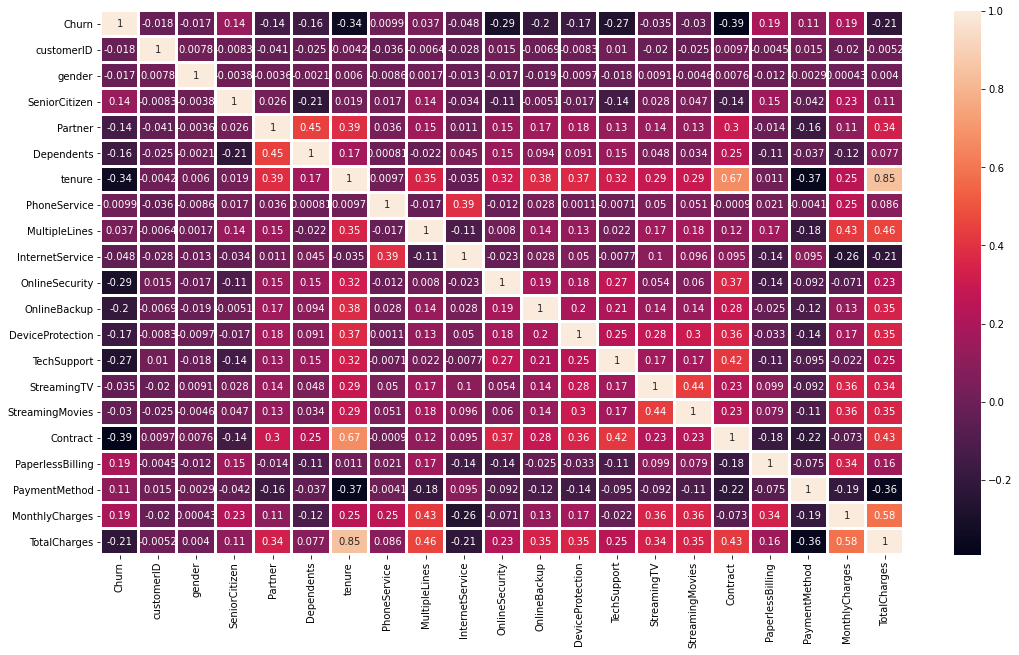

In [13]:
plt.figure(figsize=(18,10))
correlation = train.corr()
sns.heatmap(correlation, annot = True, linewidth = 2) #IN ALTERNATIVA POTEVO USARE BARPLOT E PANDA CORR

#ANALIZZO PRINCIPALMENTE I CORRELATI A CHURN, INDIVIDUO VALORI POCO SIGNIFICATIVI: 
#'StreamingMovies','StreamingTV', 'InternetService', 'gender','customerID', 'PhoneService', 'MultipleLines' 

In [14]:
toDrop = ['StreamingMovies','StreamingTV', 'InternetService', 'gender','customerID', 'PhoneService', 'MultipleLines']
train = train.drop(toDrop, axis=1)
test = test.drop(toDrop, axis=1)

train.head()

,Churn,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,1,0,0,2,0,0,0,0,0,0,2,1,0
1,0,0,1,1,64,2,0,0,2,0,1,0,2,3
2,0,0,1,1,2,1,1,1,1,0,0,3,0,0
3,0,0,1,0,71,2,0,2,2,2,0,2,2,3
4,0,1,0,0,51,1,1,1,1,2,0,1,0,1


## DEFINISCO LA PARTE DI TRAINING DEL MODELLO

In [15]:
y_train = train['Churn']          
X_train = train.drop(['Churn'], axis=1)  

y_test = test['Churn']          
X_test = test.drop(['Churn'], axis=1)

DecisionTreeClassifier()
72.27


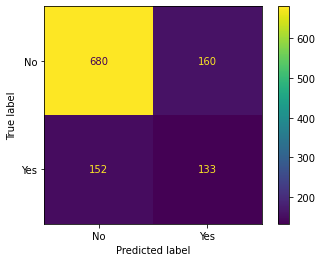



              precision    recall  f1-score   support

           0       0.82      0.81      0.81       840
           1       0.45      0.47      0.46       285

    accuracy                           0.72      1125
   macro avg       0.64      0.64      0.64      1125
weighted avg       0.73      0.72      0.72      1125

LogisticRegression(max_iter=10000, random_state=0)
80.0


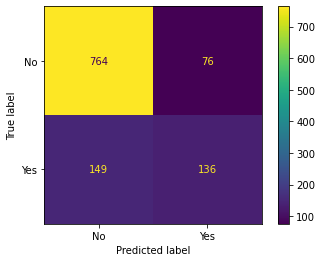



              precision    recall  f1-score   support

           0       0.84      0.91      0.87       840
           1       0.64      0.48      0.55       285

    accuracy                           0.80      1125
   macro avg       0.74      0.69      0.71      1125
weighted avg       0.79      0.80      0.79      1125

RandomForestClassifier()
79.11


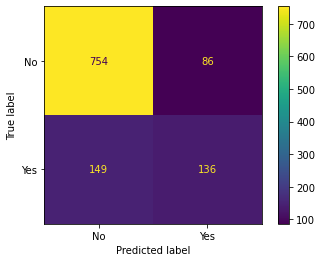



              precision    recall  f1-score   support

           0       0.83      0.90      0.87       840
           1       0.61      0.48      0.54       285

    accuracy                           0.79      1125
   macro avg       0.72      0.69      0.70      1125
weighted avg       0.78      0.79      0.78      1125



,Model,Score
1,Logistic Regression,80.00
2,Random Forest,79.11
0,Decision Tree,72.27


In [16]:
dt = DecisionTreeClassifier()
lr = LogisticRegression(random_state=0, max_iter = 10000)
rf = RandomForestClassifier()

models = [dt, lr, rf]
score = []

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = round(accuracy_score(y_pred, y_test) * 100, 2)
    score.append(acc)
    print(model)
    print(acc)
    plot_confusion_matrix(model, X_test, y_test, values_format='n', display_labels=['No','Yes']) 
    plt.show()
    print("\n")
    print(classification_report(y_test,y_pred))
    
models = pd.DataFrame({
    'Model': ['Decision Tree','Logistic Regression', 'Random Forest'],
    'Score': score})
models.sort_values(by='Score', ascending=False)

## OSSERVAZIONI

#### * In questo caso tenderei a dire che la random forest e' il piu' performante per motivi che spieghero' sotto, per comodita' ho lasciato questi 3 algoritmi per fare delle osservazioni

#### * Random Forest: Anche se non spiegato a lezione, si tratta di un algoritmo che genera una moltitudine di decision tree. Ogni singolo albero nella foresta genera una previsione. Al termine si sceglie la classe di previsione che e' stata predetta per la maggiore tra gli alberi appartenenti alla foresta. Generalmente questo sistema "a maggioranza" risulta piu' performante del singolo decision tree

#### * Logistic Regression: Non sono sicuro che utilizzare la label-encoding sia la scelta migliore, forse si potrebbe preferire la one-hot in questo caso. Per questo e' preferibile adottare il random forest